<a href="https://colab.research.google.com/github/Dojunghyun/djhdrh123/blob/main/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import os
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
path= "Cifar-tensorboard"
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(path),histogram_freq=1,profile_batch = 100000000)

cifar = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)= cifar.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("vdvdfvd")

170498071/170498071 [==============================] - 2s 0us/step
vdvdfvd


In [ ]:
import numpy as np
mean= np.mean(x_train,axis=(0,1,2,3))
std= np.std(x_train,axis=(0,1,2,3))
x_train=(x_train-mean)/(std + 1e-7)
x_test=(x_test-mean)/(std+ 1e-7)

In [ ]:
from keras.utils import np_utils

In [ ]:
nClasses =10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [ ]:
input_shape = (32,32,3)

In [ ]:
model = tf.keras.models.Sequential()
def createModel():
    model.add(tf.keras.layers.Conv2D(32,(3,3), padding= 'same', activation= 'relu',input_shape = input_shape))
    model.add(tf.keras.layers.Conv2D(32,(3,3), activation= 'relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'))
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation= 'relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Conv2D(64,(3,3), padding= 'same', activation= 'relu'))
    model.add(tf.keras.layers.Conv2D(64,(3,3), activation= 'relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(nClasses,activation='softmax'))
    
    return model

In [ ]:
tf.keras.backend.clear_session()
model = createModel()

In [ ]:
AdamOpt = tf.keras.optimizers.Adam(lr = 0.001)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= AdamOpt ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(epoch%5==0):
            print("just finished epoch", epoch)
            print("***************************")
            print("loss evaluation", logs.get('val_loss'))
            print("Accuracy reached train is ", logs.get('acc'))
            print("Accuracy reached val is ", logs.get('val_acc'))
            
            return

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
batch_size = 256
epochs = 10

model.fit(x_train,y_train,batch_size = batch_size, epochs = 2,callbacks =[tensorboard])

Epoch 1/2
196/196 [==============================] - 18s 24ms/step - loss: 1.8612 - accuracy: 0.2987
Epoch 2/2
196/196 [==============================] - 4s 22ms/step - loss: 1.4530 - accuracy: 0.4619


In [ ]:
val_loss, val_accu = model.evaluate(x_test,y_test)
print(val_loss,val_accu)

313/313 [==============================] - 1s 4ms/step - loss: 1.2466 - accuracy: 0.5513
1.24662446975708 0.5512999892234802


In [ ]:
prediction= model.predict(x_test)
print(prediction)

313/313 [==============================] - 1s 3ms/step
[[9.12829209e-03 1.18377656e-02 7.48335049e-02 ... 1.45392250e-02
  1.81893278e-02 1.04129110e-02]
 [2.62441576e-01 3.97584707e-01 1.24732580e-03 ... 2.32578859e-05
  3.18200499e-01 1.99925527e-02]
 [1.65113568e-01 8.97174776e-02 1.97938923e-02 ... 1.88553892e-03
  6.58684134e-01 4.18000184e-02]
 ...
 [9.37197357e-03 7.83242169e-04 1.11275196e-01 ... 2.14387268e-01
  3.71888350e-03 4.10406012e-03]
 [1.20200388e-01 7.07003251e-02 2.09844515e-01 ... 8.69061872e-02
  6.83813076e-03 1.01249479e-02]
 [3.11709382e-03 7.28130224e-04 4.42300364e-02 ... 6.19285643e-01
  8.61038425e-05 1.59546966e-03]]


6


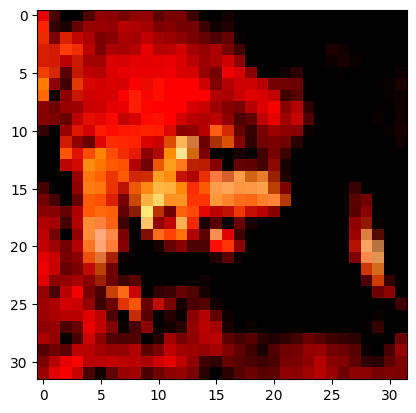

In [ ]:
import numpy as np
print(np.argmax(prediction[5]))
plt.imshow(x_test[5],cmap='gray')